In [3]:
# Import packages
### YOUR CODE HERE ###

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [4]:
data = pd.read_csv('/content/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
data = data.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
data.duplicated().sum()

3008

In [11]:
data1 = data.drop_duplicates(keep = "first")
data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='tenure'>

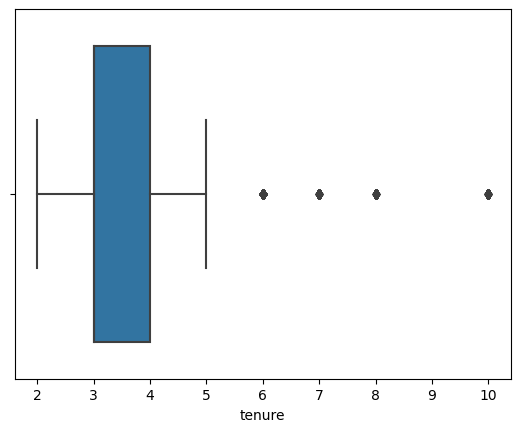

In [12]:
sns.boxplot(x=data1['tenure'])


In [13]:
percentile25 = data1['tenure'].quantile(0.25)
percentile75 = data1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = data1[(data1['tenure'] > upper_limit) | (data1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [14]:
data1['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

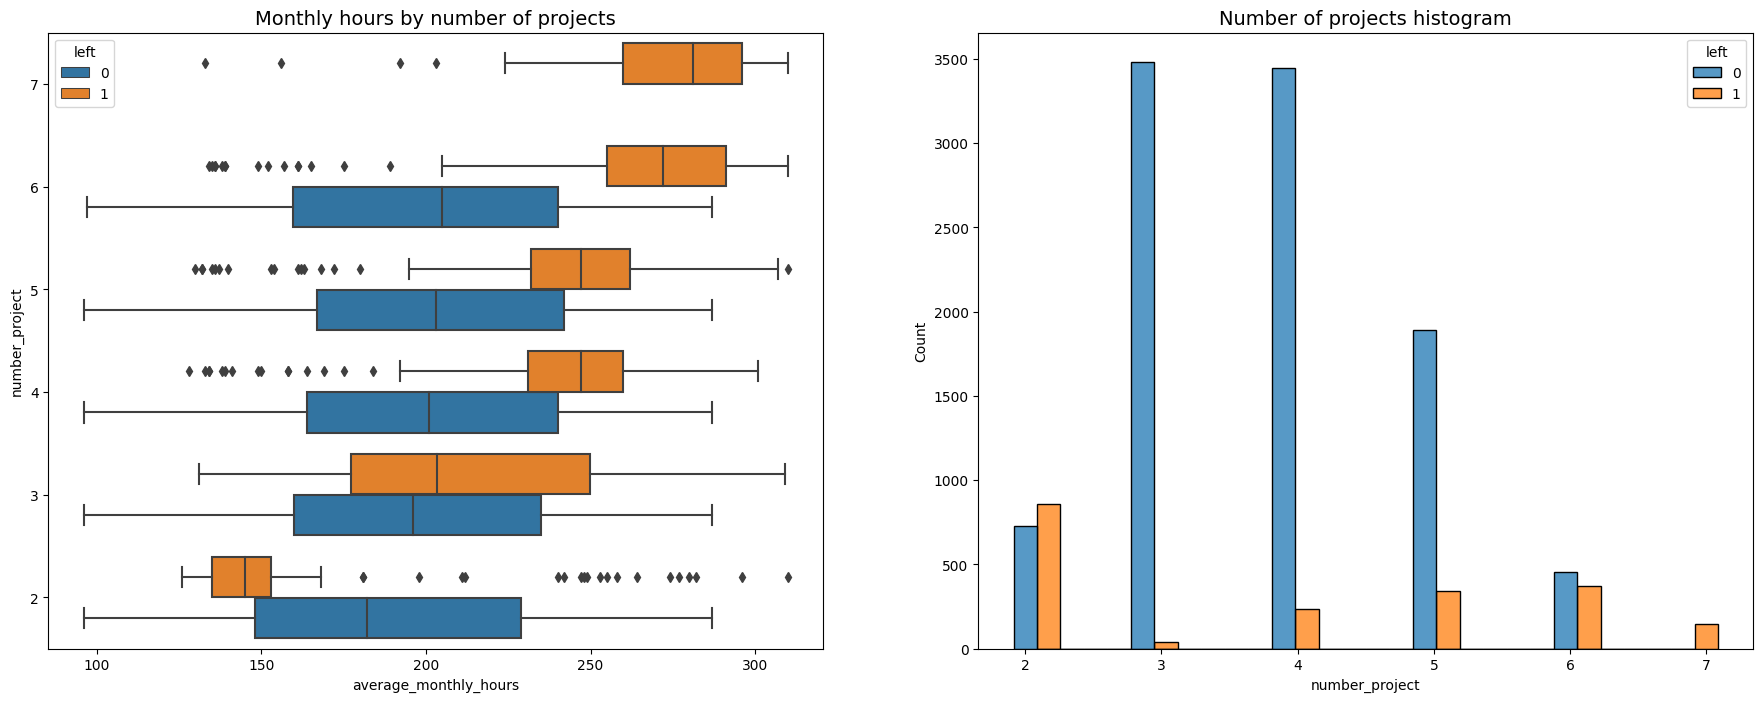

In [15]:
fig, ax = plt.subplots(1 , 2 ,figsize = (22,8))
sns.boxplot(data = data1, x = 'average_monthly_hours', y = 'number_project', hue = "left", orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = data1[data1['left']==0]['number_project']
tenure_left = data1[data1['left']==1]['number_project']
sns.histplot(data=data1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

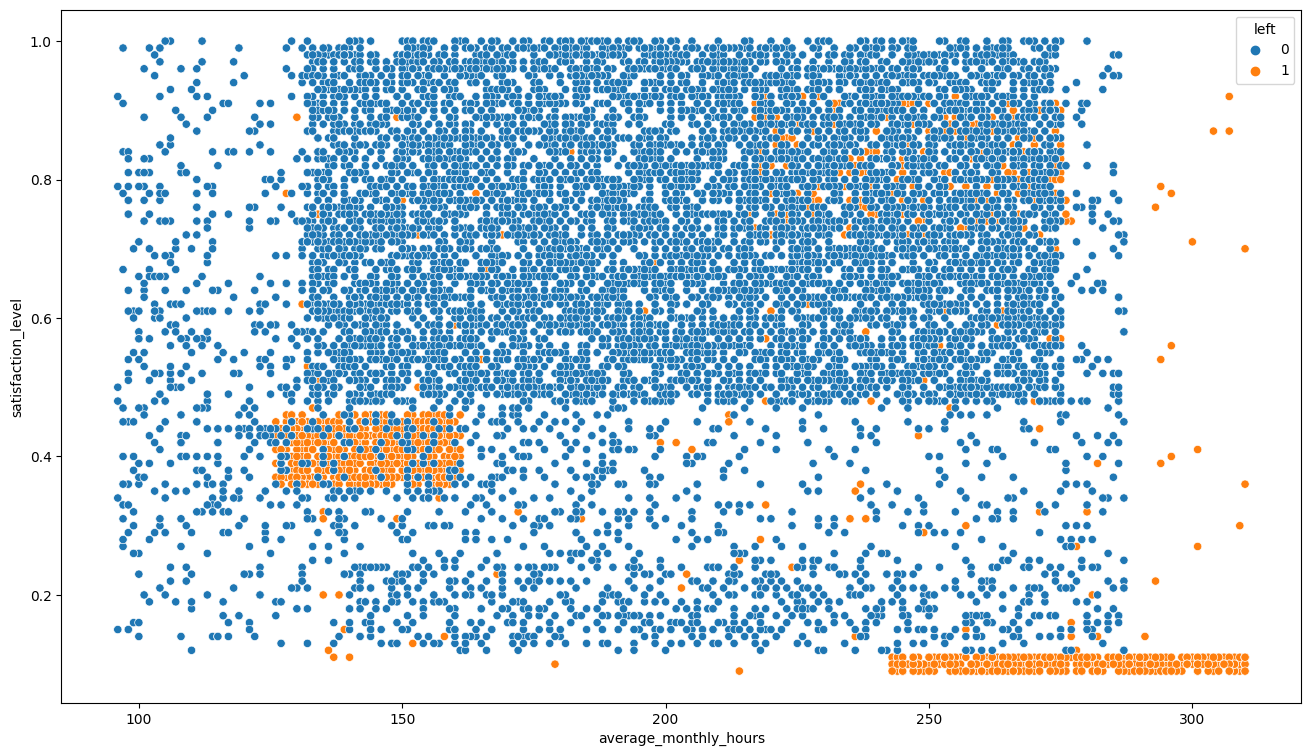

In [16]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = data1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left')
plt.show()

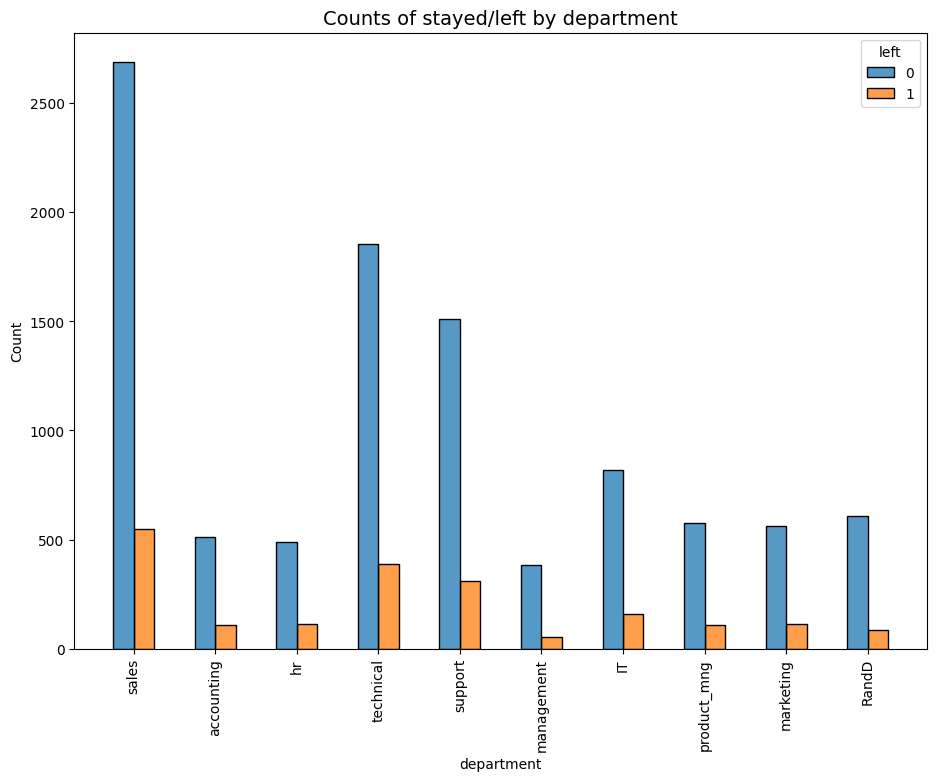

In [17]:
plt.figure(figsize=(11,8))
sns.histplot(data=data1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);

In [18]:
print(data1['department'].unique())
print(data1['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [19]:
data1['department'] = data1['department'].replace({'sales':1,'accounting':2,'hr':3, 'technical':4, 'support':5, 'management':6,'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10})
data1['salary'] = data1['salary'].replace({'low':0,'medium':1, 'high':2})
data1.head()

<ipython-input-19-3f3b292facc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['department'] = data1['department'].replace({'sales':1,'accounting':2,'hr':3, 'technical':4, 'support':5, 'management':6,'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10})
<ipython-input-19-3f3b292facc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['salary'] = data1['salary'].replace({'low':0,'medium':1, 'high':2})


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


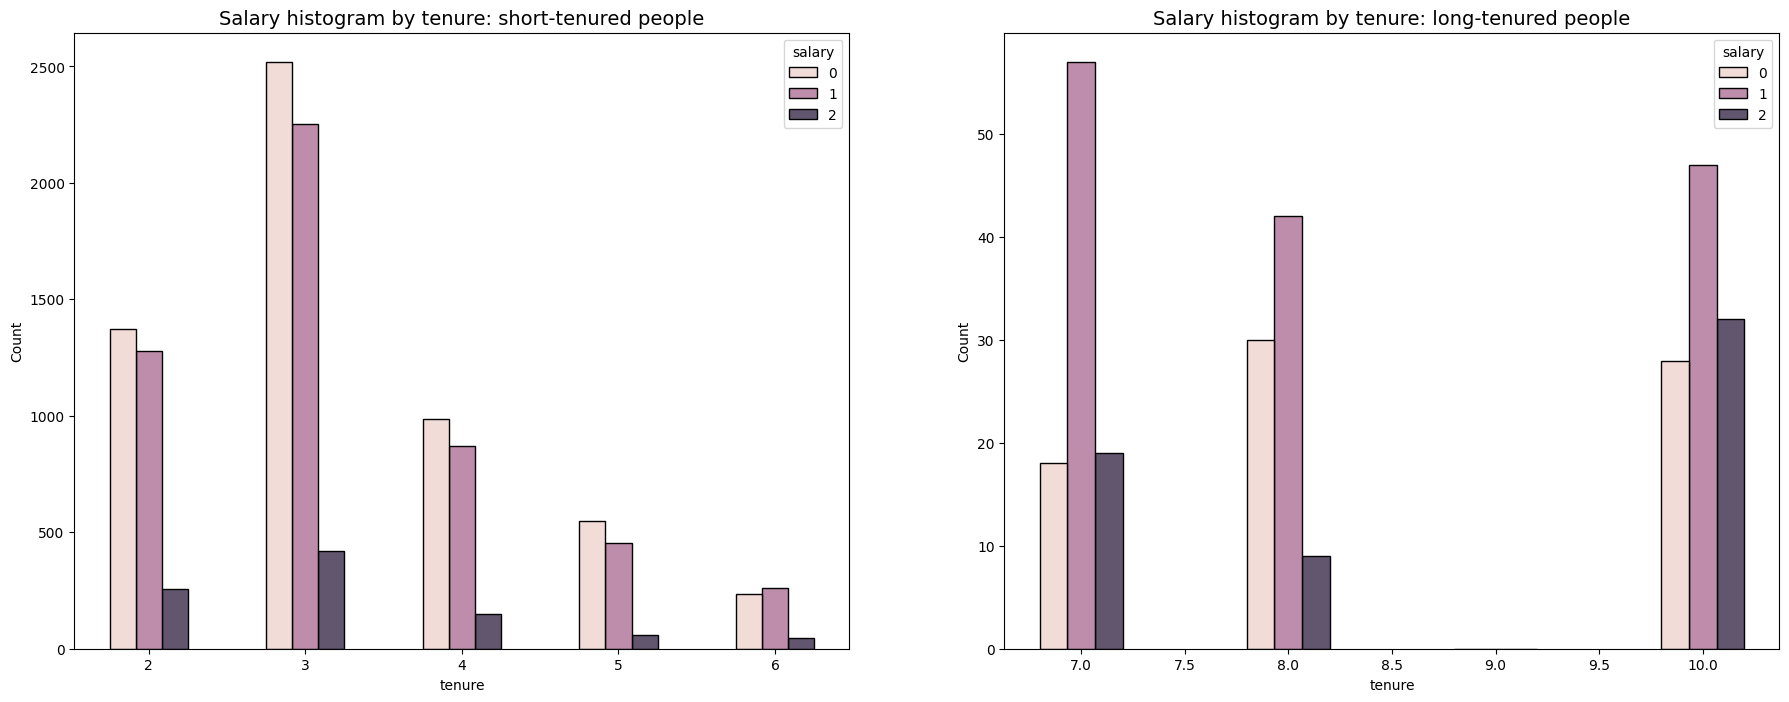

In [20]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = data1[data1['tenure'] < 7]

# Define long-tenured employees
tenure_long = data1[data1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['0', '1', '2'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['0', '1', '2'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

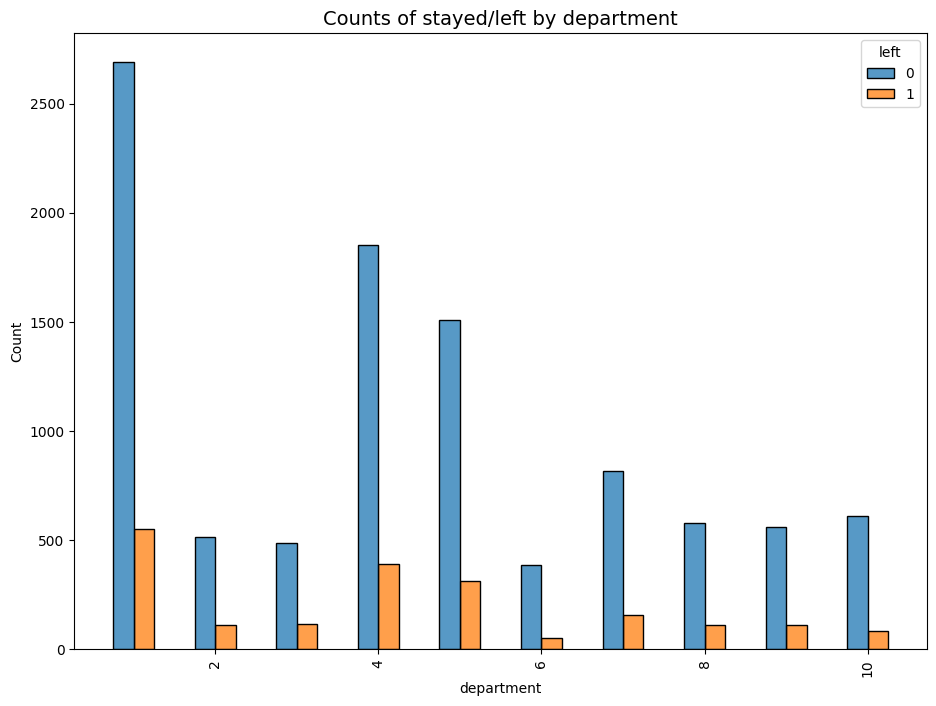

In [21]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=data1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);
plt.show()

In [22]:
y = data1['left']

In [23]:
X = data1.drop('left', axis =1 )

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [25]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

In [26]:
with open('/content/model.pickle', 'wb') as wr:
  pickle.dump(log_clf, wr)

In [27]:
y_pred = log_clf.predict(x_test)

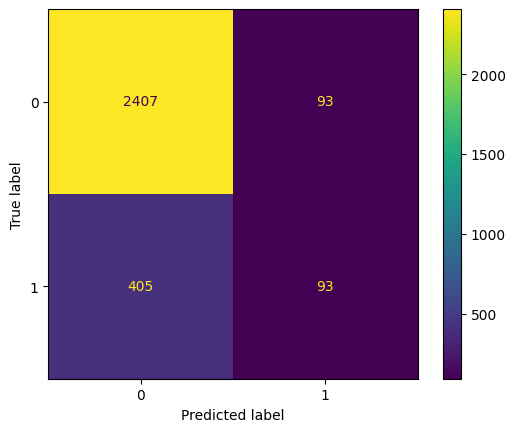

In [28]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [33]:
target_names = ['Predicted would not leave', 'Predicted would leave']
cr = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
print(cr)

{'Predicted would not leave': {'precision': 0.8559743954480796, 'recall': 0.9628, 'f1-score': 0.90625, 'support': 2500}, 'Predicted would leave': {'precision': 0.5, 'recall': 0.18674698795180722, 'f1-score': 0.2719298245614035, 'support': 498}, 'accuracy': 0.8338892595063375, 'macro avg': {'precision': 0.6779871977240398, 'recall': 0.5747734939759036, 'f1-score': 0.5890899122807017, 'support': 2998}, 'weighted avg': {'precision': 0.7968432250234153, 'recall': 0.8338892595063375, 'f1-score': 0.8008826059478249, 'support': 2998}}


In [35]:
dd = pd.DataFrame(cr).transpose()
dd

,precision,recall,f1-score,support
Predicted would not leave,0.855974,0.962800,0.906250,2500.000000
Predicted would leave,0.500000,0.186747,0.271930,498.000000
accuracy,0.833889,0.833889,0.833889,0.833889
macro avg,0.677987,0.574773,0.589090,2998.000000
weighted avg,0.796843,0.833889,0.800883,2998.000000


In [36]:
dd.to_csv('metrics.csv')

In [39]:
tree = DecisionTreeClassifier(random_state = 0)
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf' : [2,5,1],
             'min_samples_split':[2,5,6]}
scoring = {'accuracy','precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [40]:
tree1.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 5, 6]},
             refit='roc_auc',
             scoring={'recall', 'f1', 'precision', 'roc_auc', 'accuracy'})

In [41]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [42]:
tree1.best_score_

0.97392388161699

In [43]:
tree_importance = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns = ['gini_importance'], index = X.columns)
tree_importance = tree_importance.sort_values(by = 'gini_importance', ascending = False)
tree_importance = tree_importance[tree_importance['gini_importance'] != 0]

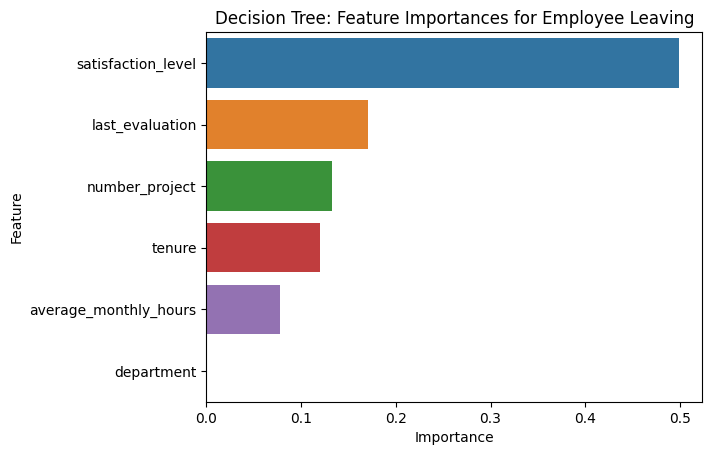

In [44]:
sns.barplot(data=tree_importance, x="gini_importance", y=tree_importance.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()